The goal of this assignment is the implementation of the [Algebraic Reconstruction Technique (ART)](https://en.wikipedia.org/wiki/Algebraic_reconstruction_technique), better known as the [Kaczmarz Method](https://en.wikipedia.org/wiki/Kaczmarz_method), as discussed in the lecture. We provide an exemplary system of equations corresponding to a computed tomography problem to test your implementation.

In [1]:
#################################################################
#
#   main.py
#   main file for the demonstration of the ART algorithm
#   written by: Walter Simson
#               Chair for Computer Aided Medical Procedures
#               & Augmented Reality
#               Technical University of Munich
#               27.10.2017
#   based on the work of Maximilian Baust
#
#################################################################

import warnings

import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio


Complete the implementation of the **art** function.

In [2]:
def load_data(file_name):
    mat_contents = sio.loadmat(file_name)
    A = mat_contents['A']
    b = mat_contents['b']
    x = mat_contents['x']
    return A, b, x


def art(A, b, iterations):

    # For help with numpy (the numerical programming library for Python) check out this resource:
    # https://www.safaribooksonline.com/library/view/python-for-data/9781449323592/ch04.html
    x = np.zeros((A.shape[1]))
    # Initialize variables squared_norm (see numpy.zeros)
    squared_norm = np.zeros((A.shape[1]))

    # Iterate over rows and compute the squared norm row-wise (we will need this in a second)
    # Hint: look into ranges
    for row in range(0, A.shape[1]):
        squared_norm[row] = np.dot(A[row, :], A[row, :])

    # Iterate over iterations
    for i in range(iterations):
        # Iterate over matrix rows
        for row in range(A.shape[1]):
            
            # x' = x + correction
            correction = np.subtract(b[row], np.dot(A[row, :].T, x)) * A[row, :].T * (1 / squared_norm[row])             
            x = x + correction

    return x


In [3]:
# Clean up
plt.close('all')

# Load system of equations
# A is the system matrix, b is the right hand side,
# x is the true solution, i.e. Ax=b
A, b, x = load_data("system.mat")

# Set number of iterations
iterations = 10

Play around with the number of iterations and try to apply the ART to other systems of equations as well.

In [4]:
# Solve LSE with numpy solver
x_np = np.linalg.solve(A, b)
x_np = x_np.reshape((60, 60))
# Warn like MATLAB
x_cond = np.linalg.cond(A)
warnings.warn("Warning: Matrix is close to singular or badly scaled." +
             " Results may be inaccurate. Condition = {0}.".format(x_cond))

# Solve LSE with ART
x_art = art(A, b, iterations)
x_art = x_art.reshape((60, 60))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Warning: Matrix is close to singular or badly scaled. Results may be inaccurate. Condition = 4.8545022350249165e+17.
  import sys


Compare the obtained result to Numpy’s standard solver, i.e. **np.linalg.solve(A,b)**. What are your conclusions? What is a singular matrix?

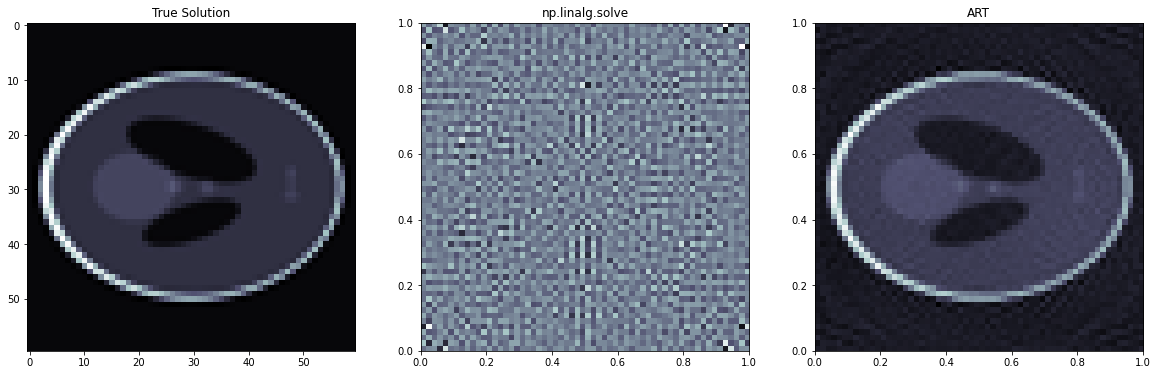

In [5]:
# Plot true solution
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(x.reshape((60, 60)), cmap="bone")
plt.title('True Solution')
plt.draw()

# np.linalg.solve
fig.add_subplot(1, 3, 2)
plt.imshow(x_np.reshape((60, 60)), extent=[0, 1, 0, 1], cmap='bone')
plt.title('np.linalg.solve')
plt.draw()

# ART
fig.add_subplot(1, 3, 3)
plt.imshow(x_art.reshape((60, 60)), extent=[0, 1, 0, 1], cmap='bone')
plt.title('ART')
plt.draw()

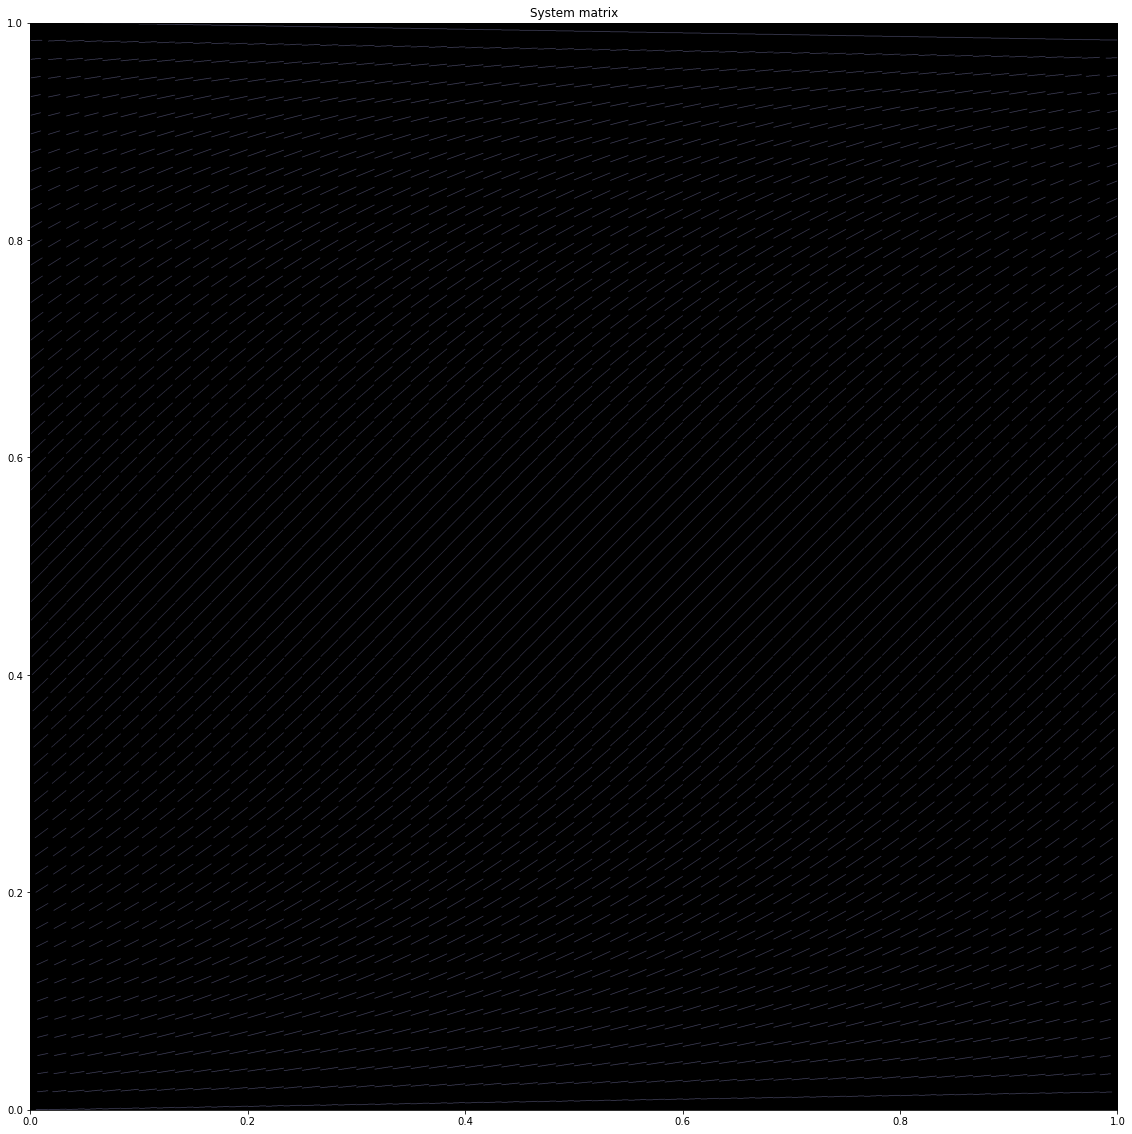

In [6]:
# plot A
plt.imshow(A, extent=[0, 1, 0, 1], cmap='bone')
plt.title('System matrix')
plt.draw()